In [1]:
# import libraries

#!/usr/bin/env python
# coding: utf-8

#

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
import plotly.express as px
%matplotlib inline

#

In [3]:
#get the data

def get_data(week_nums):
    # Returns the data from the MTA website
    
    #Parameters:
    #   week_nums (list): a list of the week that the MTA website snapshotted
    
    #Returns:
    #   pd.concat(dfs) (DataFrame): a dataframe of all the weeks concatenated in one DataFrame
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

week_nums = [210828, 210821, 210814, 210807, 210731, 210724, 210717, 210710, 210703, 210626,210619, 210612, 210605]
turnstiles_df = get_data(week_nums)

#

In [4]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802


In [5]:
turnstiles_df.tail()


#

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209526,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,05:00:00,REGULAR,5554,577
209527,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,09:00:00,REGULAR,5554,577
209528,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,13:00:00,REGULAR,5554,577
209529,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,17:00:00,REGULAR,5554,577
209530,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/04/2021,21:00:00,REGULAR,5554,577


In [6]:
turnstiles_df.describe()


#

,ENTRIES,EXITS
count,2.722610e+06,2.722610e+06
mean,4.168248e+07,3.329946e+07
std,2.185146e+08,1.919706e+08
min,0.000000e+00,0.000000e+00
25%,2.179232e+05,9.944325e+04
50%,1.405620e+06,8.552440e+05
75%,6.023157e+06,3.968192e+06
max,2.147417e+09,2.122890e+09


In [7]:
turnstiles_df.info()


#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722610 entries, 0 to 209530
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [8]:
# From importing the data from the website, we noticed some extra spaced columns
turnstiles_df.columns


#

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
# The purpose of this line of code is to fix and adjust the extra spacing in the columns
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns


#

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
# Three months of Data
turnstiles_df.DATE.value_counts().sort_index()


#

05/29/2021    29939
05/30/2021    29812
05/31/2021    29997
06/01/2021    29889
06/02/2021    29870
              ...  
08/23/2021    29865
08/24/2021    30191
08/25/2021    29978
08/26/2021    29803
08/27/2021    29537
Name: DATE, Length: 91, dtype: int64

In [11]:
# Since our imported data's date and time columns are object dtype, we need to put the date and time in a single column and change from object to datetime dtype to help us to access the data easily
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME,format="%m/%d/%Y %H:%M:%S")


#

In [12]:
turnstiles_df.head()


#

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00


In [13]:
# By applying the mask concept we can filter the data for such a specefic station
mask = ((turnstiles_df["C/A"] == "R504") &
(turnstiles_df["UNIT"] == "R276") &
(turnstiles_df["SCP"] == "00-00-01") &
(turnstiles_df["STATION"] == "VERNON-JACKSON"))

turnstiles_df[mask].head()


#

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
185481,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,00:00:00,REGULAR,10765767,1961778,2021-08-21 00:00:00
185482,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,04:00:00,REGULAR,10765782,1961797,2021-08-21 04:00:00
185483,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,08:00:00,REGULAR,10765807,1961825,2021-08-21 08:00:00
185484,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,12:00:00,REGULAR,10765905,1961881,2021-08-21 12:00:00
185485,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,16:00:00,REGULAR,10766064,1961959,2021-08-21 16:00:00


In [14]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))


#

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2448636,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 04:00:00,2
1172385,N335,R158,01-00-03,KEW GARDENS,2021-06-20 18:30:00,2
2457222,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 00:00:00,2
2457223,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 04:00:00,2
2457224,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 08:00:00,2
...,...,...,...,...,...,...
907526,N127,R442,00-00-02,SHEPHERD AV,2021-08-21 05:00:00,1
907527,N127,R442,00-00-02,SHEPHERD AV,2021-08-21 09:00:00,1
907528,N127,R442,00-00-02,SHEPHERD AV,2021-08-21 13:00:00,1
907529,N127,R442,00-00-02,SHEPHERD AV,2021-08-21 17:00:00,1


In [15]:
# The detailed information about duplicated rows
turnstiles_df[turnstiles_df.duplicated(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])]


#

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
188771,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/24/2021,16:00:00,RECOVR AUD,2073107,1083443,2021-08-24 16:00:00
188773,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/24/2021,20:00:00,RECOVR AUD,2073326,1083482,2021-08-24 20:00:00
188775,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,00:00:00,RECOVR AUD,2073354,1083493,2021-08-25 00:00:00
188778,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,08:00:00,RECOVR AUD,2073376,1083606,2021-08-25 08:00:00
188780,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,12:00:00,RECOVR AUD,2073431,1083737,2021-08-25 12:00:00
188782,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,16:00:00,RECOVR AUD,2073533,1083789,2021-08-25 16:00:00
188784,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/25/2021,20:00:00,RECOVR AUD,2073780,1083833,2021-08-25 20:00:00
188786,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/26/2021,00:00:00,RECOVR AUD,2073806,1083850,2021-08-26 00:00:00
188789,R516,R291,00-00-00,33 ST-RAWSON ST,7,IRT,08/26/2021,08:00:00,RECOVR AUD,2073825,1083952,2021-08-26 08:00:00
188864,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/24/2021,16:00:00,RECOVR AUD,1535272,1649066,2021-08-24 16:00:00


In [16]:
# Number of diplicarted rows
turnstiles_df.duplicated(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).sum()


#

29

In [17]:
# By applying the mask concept we can filter the data for such a specefic station and time
mask1 = ((turnstiles_df["C/A"] == "R504") &
(turnstiles_df["UNIT"] == "R276") &
(turnstiles_df["SCP"] == "00-00-01") &
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == dt.datetime(2021, 8, 21).date()))


#

In [18]:
turnstiles_df[mask1].head()


#

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
185481,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,00:00:00,REGULAR,10765767,1961778,2021-08-21 00:00:00
185482,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,04:00:00,REGULAR,10765782,1961797,2021-08-21 04:00:00
185483,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,08:00:00,REGULAR,10765807,1961825,2021-08-21 08:00:00
185484,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,12:00:00,REGULAR,10765905,1961881,2021-08-21 12:00:00
185485,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/21/2021,16:00:00,REGULAR,10766064,1961959,2021-08-21 16:00:00


In [19]:
# To check if there is any NULL value
turnstiles_df.info()


#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722610 entries, 0 to 209530
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 270.0+ MB


In [20]:
# To check if there is any NULL value
turnstiles_df.isna().sum()


#

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

In [22]:
# Handle missing values if any
#since there is no NaN data we dont use this
#turnstiles_df = turnstiles_df.dropna()
#

In [23]:
# Alternative methode to handle missing values if any
#turnstiles_df.fillna(0)
#

In [24]:
# By applying the mask concept we can filter the data for such a specefic station and time
mask2 = ((turnstiles_df["C/A"] == "R504")&(turnstiles_df["UNIT"] == "R276")&(turnstiles_df["SCP"] == "00-00-01")&(turnstiles_df["STATION"] == "VERNON-JACKSON")&(turnstiles_df["DESC"] == "RECOVR AUD")&(turnstiles_df["DATE_TIME"].dt.date == dt.datetime(2021, 8, 16).date()))
turnstiles_df[mask2].head()


#

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
185377,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,08/16/2021,16:00:00,RECOVR AUD,10762706,1960337,2021-08-16 16:00:00


In [25]:
turnstiles_df.DESC.value_counts()


#

REGULAR       2710456
RECOVR AUD      12154
Name: DESC, dtype: int64

In [26]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)


#

In [27]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

#

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-29 00:00:00,1
1815048,R138,R293,00-03-02,34 ST-PENN STA,2021-07-22 18:00:00,1
1815050,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 02:00:00,1
1815051,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 06:00:00,1
1815052,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 10:00:00,1


In [28]:
# No more duplicated rows
turnstiles_df.duplicated(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).sum()


#

0

In [29]:


# The detailed information about non-duplicated rows
turnstiles_df[turnstiles_df.duplicated(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])]


#

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME


In [30]:


# The sum of number of entries for each unique turnstile at a specefict time and date
turnstiles_daily = (turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],as_index=False).ENTRIES.first())

turnstiles_daily.head(20)


#

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,05/29/2021,00:00:00,7578734
1,A002,R051,02-00-00,59 ST,05/29/2021,04:00:00,7578740
2,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,7578749
3,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,7578789
4,A002,R051,02-00-00,59 ST,05/29/2021,16:00:00,7578897
5,A002,R051,02-00-00,59 ST,05/29/2021,20:00:00,7579021
6,A002,R051,02-00-00,59 ST,05/30/2021,00:00:00,7579078
7,A002,R051,02-00-00,59 ST,05/30/2021,04:00:00,7579084
8,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,7579085
9,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,7579093


In [31]:


turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

# Handle missing values if any
turnstiles_daily.dropna()

turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()


# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011")&(turnstiles_df["UNIT"] == "R080")&(turnstiles_df["SCP"] == "01-00-00")&(turnstiles_df["STATION"] == "57 ST-7 AV")&(turnstiles_df["DATE_TIME"].dt.date == dt.datetime(2021, 8, 27).date()))
turnstiles_df[mask].head()

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size())


#

<ipython-input-31-647eeef60cc9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         537
A013  R081  01-06-01  49 ST                1
A014  R081  02-00-00  49 ST                1
A049  R088  02-00-02  CORTLANDT ST         1
            02-05-00  CORTLANDT ST        35
                                        ... 
R621  R060  00-06-00  EASTN PKWY-MUSM      1
R622  R123  00-00-00  FRANKLIN AV        551
R633  R068  00-00-01  VAN SICLEN AV        1
R646  R110  01-00-02  FLATBUSH AV-B.C      1
R730  R431  00-00-04  EASTCHSTER/DYRE    495
Length: 212, dtype: int64

In [32]:


def get_daily_counts(row, max_counter):
    #returns a fixed number of enties and not an increment of the last exit
    
    #Parameter:
    #    row (int): the row currently in
    #    max counter(int): larges int it has seen in the list
    
    #RETURN:
    #    counter (int): fix number of enties
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0?
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

turnstiles_daily.head(15)


#

193 8049630.0
167790067 702272.0
31 8724126.0
67 1605140.0
5671 4298891.0
0 117440512.0
327680 7577112.0
67109632 14.0
327682 67109640.0
15 67109632.0
12517553 147.0
14 1198448.0
46 5405537.0
687970041 19471254.0
23 705357551.0
30 7489966.0
16777220 1037161.0
6 16034831.0
34 6214051.0
37 1950780.0
173 15689534.0
2 33030307.0
36880392 2.0
0 36880392.0
1418346 304234.0
304236 1418346.0
8 1255797.0
56 3102579.0
50362839 251769.0
114 1953573.0
90 4788322.0
393362 104111192.0
26 6250045.0
118 909043641.0
196713 1891026.0
196673 3277263.0
41 303654987.0
11 3145979.0
35 10737302.0
1441860 12919101.0
13942393 8899046.0
142 1653444.0
61 11851571.0
24 1925928.0
327681 50346231.0
23 6481464.0
34 1383110353.0


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/29/2021,04:00:00,7578740,05/29/2021,7578734.0,6.0
2,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,7578749,05/29/2021,7578740.0,9.0
3,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,7578789,05/29/2021,7578749.0,40.0
4,A002,R051,02-00-00,59 ST,05/29/2021,16:00:00,7578897,05/29/2021,7578789.0,108.0
5,A002,R051,02-00-00,59 ST,05/29/2021,20:00:00,7579021,05/29/2021,7578897.0,124.0
6,A002,R051,02-00-00,59 ST,05/30/2021,00:00:00,7579078,05/29/2021,7579021.0,57.0
7,A002,R051,02-00-00,59 ST,05/30/2021,04:00:00,7579084,05/30/2021,7579078.0,6.0
8,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,7579085,05/30/2021,7579084.0,1.0
9,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,7579093,05/30/2021,7579085.0,8.0
10,A002,R051,02-00-00,59 ST,05/30/2021,16:00:00,7579165,05/30/2021,7579093.0,72.0


In [33]:


turnstiles_dailye = (turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],as_index=False).EXITS.first())
turnstiles_dailye[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_dailye.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"].apply(lambda grp: grp.shift(1)))
turnstiles_dailye.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_dailye.dropna()
turnstiles_dailye[turnstiles_dailye["EXITS"] < turnstiles_dailye["PREV_EXITS"]].head()


#

<ipython-input-33-3de49970f461>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_dailye[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_dailye.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"].apply(lambda grp: grp.shift(1)))


,C/A,UNIT,SCP,STATION,DATE,TIME,EXITS,PREV_DATE,PREV_EXITS
21301,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,04:00:00,489577542,05/29/2021,489577552.0
21302,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,08:00:00,489577494,05/29/2021,489577542.0
21303,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,12:00:00,489577348,05/29/2021,489577494.0
21304,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,16:00:00,489577133,05/29/2021,489577348.0
21305,A011,R080,01-03-00,57 ST-7 AV,05/29/2021,20:00:00,489576988,05/29/2021,489577133.0


In [34]:


def get_daily_countsy(row, max_counter):
    #returns a fixed number of exit and not an increment of the last exit
    
    #Parameter:
    #    row (int): the row currently in
    #    max counter(int): larges int it has seen in the list
    
    #RETURN:
    #    counter (int): fix number of exits
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0?
        #print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.
# Just set it to zero as different counters have different cycle limits

turnstiles_dailye["DAILY_EXITS"] = turnstiles_dailye.apply(get_daily_countsy, axis=1, max_counter=1000000)


turnstiles_daily["DAILY_EXITS"]= turnstiles_dailye["DAILY_EXITS"]

turnstiles_daily.head()


#

14 1653840.0
63 2357391.0
268473354 1083236.0
36 8512839.0
7 1025567.0
306 1152627.0
800988285 4318079.0
4318092 800988285.0
0 2004698.0
14090469 225.0
7 1502424.0
50 1852012.0
1174467459 4612076.0
4 705468481.0
1057292926 347736.0
347800 1057292926.0
4 1671513.0
25 7304094.0
17 6525614.0
33 2136659.0
1179 3095180.0
208 8944327.0
0 654311429.0
0 1240819.0
0 2974479.0
196 3150987.0
11 1005893.0
604001837 2369108.0
63 2607848.0
55 68794400.0
134 16055255.0
46 1875745913.0
111 1958224.0
63 1885963.0
32 236191318.0
139 1758593.0
137 9252156.0
6714230 2117913.0
377 2365412.0
44 11825803.0
0 134263112.0
29 2490084.0
57 804264411.0


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,05/29/2021,04:00:00,7578740,05/29/2021,7578734.0,6.0,2.0
2,A002,R051,02-00-00,59 ST,05/29/2021,08:00:00,7578749,05/29/2021,7578740.0,9.0,13.0
3,A002,R051,02-00-00,59 ST,05/29/2021,12:00:00,7578789,05/29/2021,7578749.0,40.0,46.0
4,A002,R051,02-00-00,59 ST,05/29/2021,16:00:00,7578897,05/29/2021,7578789.0,108.0,32.0
5,A002,R051,02-00-00,59 ST,05/29/2021,20:00:00,7579021,05/29/2021,7578897.0,124.0,21.0


In [35]:

#adding trafic and day columns
turnstiles_daily['TRAFIC'] = turnstiles_daily['DAILY_EXITS'] + turnstiles_daily['DAILY_ENTRIES']
turnstiles_daily["DATE_TIME"] = pd.to_datetime(turnstiles_daily.DATE + " " + turnstiles_daily.TIME,format="%m/%d/%Y %H:%M:%S")
turnstiles_daily['DAY']=turnstiles_daily.DATE_TIME.dt.day_name()
turnstiles_daily=turnstiles_daily[['C/A','UNIT','SCP','STATION','DATE','TIME','DATE_TIME','DAY','DAILY_ENTRIES','DAILY_EXITS','TRAFIC']]

#

[Text(0.5, 1.0, 'LEAST CROWDED STATIONS'), Text(0, 0.5, 'TRAFFIC (mean)')]

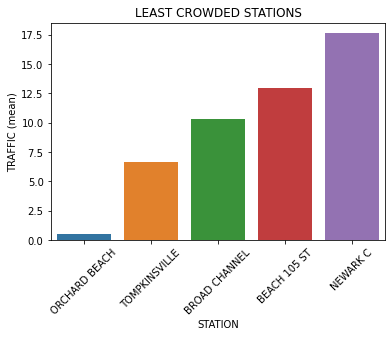

In [46]:
#10 least crowded station
turnstiles_stations = turnstiles_daily.groupby('STATION').mean().reset_index().sort_values('TRAFIC',ascending=True).head(5)
ax = sns.barplot(x="STATION", y="TRAFIC", data=turnstiles_stations)
plt.xticks(rotation=45)
ax.set(title='LEAST CROWDED STATIONS' ,ylabel='TRAFFIC (mean)')

#From this graph, we can see that Orchard Beach is the least commonly used Station.
#and from this, we check what days do people use this station.

[Text(0.5, 1.0, 'DAILY TRAFFIC LEAST CROWDED STATIONS'),
 Text(0, 0.5, 'TRAFFIC (mean)')]

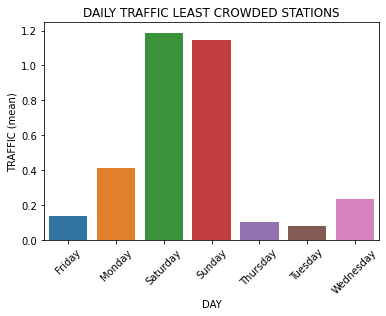

In [49]:
#most crowded day for ORCHARD BEACH
turnstile_OB =turnstiles_daily[turnstiles_daily['STATION']=='ORCHARD BEACH']
turnstile_OBb = turnstile_OB.groupby('DAY').mean().reset_index()
ax = sns.barplot(x="DAY", y="TRAFIC", data=turnstile_OBb)
plt.xticks(rotation=45)
ax.set(title='DAILY TRAFFIC LEAST CROWDED STATIONS' ,ylabel='TRAFFIC (mean)')

#From this, we can see that workdays are the least commonly used since the station is close to the beach.

[Text(0.5, 1.0, 'LEAST CROWDED STATIONS WITH RESPECT TO TIME'),
 Text(0, 0.5, 'TRAFFIC (mean)')]

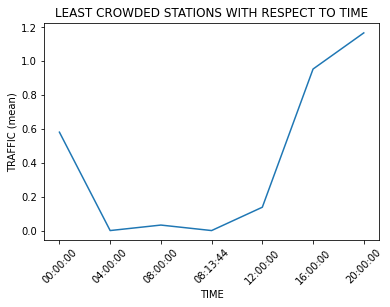

In [51]:
#And we check on average traffic on that station with respect to time.
turnstile_OB=turnstile_OB.groupby("TIME").mean().sort_values('TIME',ascending=True).reset_index()
ax = sns.lineplot(x="TIME", y="TRAFIC", data=turnstile_OB)
plt.xticks(rotation=45)
ax.set(title='LEAST CROWDED STATIONS WITH RESPECT TO TIME' ,ylabel='TRAFFIC (mean)')
#We see that from 4 am to 8 am it's practically not used at all .
#so we can shut down the station at that time during the workdays and that would reduce the electricity bill.